Suppose we are running an online business that sells groceries.  We want to create a table that represents the characteristics of the groceries.  Each item has a name; a price; a quantity purchased; a date of purchase; and a state in which it was purchased.

I am going to deliberately introduce null values, duplicate rows, and data values that don't make sense.  I will then pretend I don't know about these problems and write some code to detect them.

To demonstrate how to research code, I will do some Google and ChatGPT searches.  According to the course policy, you are required to show the Generative AI searches you did.

### Comments:
### Please do not use any of this code unless you understand how it works!
### Understanding code is your goal in this course.
### In your homework, try to go beyond what's in this notebook and do some things that are your own.

In [1]:
import random
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
numrows = 100
np.random.seed(0)
random.seed(0)
df_groceries = pd.DataFrame({})
df_groceries["name"] = [random.choice(["apples_pound", "oranges_pound", "bananas_pound", "milk_gallon", "lettuce"]) for num in range(numrows)]

In [2]:
numrows = 100
df_groceries = pd.DataFrame({})
#df_groceries["name"] = ["apple", "banana", "orange", "milk", "lettuce"]
df_groceries["name"] = [random.choice(["apples_pound", "bananas_pound", "oranges_pound", "milk_gallon", "lettuce"]) for x in range(numrows)]

In [3]:
def choose_unit_price(name):
    if(name == "apples_pound"):
        return random.uniform(1.00, 2.00)
    elif(name == "oranges_pound"):
        return random.uniform(2.00, 4.00)
    elif(name == "bananas_pound"):
        return random.uniform(1.00, 2.00)
    elif(name == "milk_gallon"):
        return random.uniform(3.00, 5.00)
    elif(name == "lettuce"):
        return random.uniform(1.50, 2.50)

In [4]:
df_groceries["unit_price"] = df_groceries["name"].apply(choose_unit_price)
df_groceries["quantity"] = [random.randint(1, 5) for num in range(numrows)]

In [5]:
start = datetime(2020, 1, 1)
end = datetime(2025, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = numrows)
df_groceries["date_purchased"] = start + pd.to_timedelta(random_days, unit='D')
df_groceries["state"] = [random.choice(["NY", "MA", "CA"]) for num in range(numrows)]

In [6]:
df_groceries

,name,unit_price,quantity,date_purchased,state
0,oranges_pound,2.777284,3,2021-11-15,MA
1,lettuce,2.157616,1,2021-07-13,MA
2,bananas_pound,1.153413,2,2024-07-11,CA
3,bananas_pound,1.690823,2,2023-05-01,NY
4,lettuce,1.957954,3,2022-04-15,NY
...,...,...,...,...,...
95,milk_gallon,3.917329,5,2021-10-01,MA
96,lettuce,1.935441,2,2023-03-01,MA
97,lettuce,2.371411,1,2022-08-30,MA
98,oranges_pound,2.356577,2,2022-05-18,MA


In [7]:
df_groceries.describe()

,unit_price,quantity,date_purchased
count,100.000000,100.000000,100
mean,2.244599,2.740000,2022-04-03 12:28:48
min,1.014729,1.000000,2020-01-29 00:00:00
25%,1.608169,1.750000,2021-03-19 12:00:00
50%,1.925289,3.000000,2022-02-14 12:00:00
75%,2.757690,4.000000,2023-03-24 12:00:00
max,4.922406,5.000000,2024-11-13 00:00:00
std,0.953421,1.353036,NaN


In [8]:
df_groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            100 non-null    object        
 1   unit_price      100 non-null    float64       
 2   quantity        100 non-null    int64         
 3   date_purchased  100 non-null    datetime64[ns]
 4   state           100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ KB


In [9]:
df_groceries.shape

(100, 5)

In [10]:
# Introducing "bugs"
df_groceries.loc[4, "state"] = np.nan
df_groceries.loc[1, "unit_price"] = 1000000
df_groceries.loc[3, "state"] = "ZZ"
df_groceries.loc[2, "name"] = "television"

In [11]:
# Detecting "bugs"
df_groceries.isna().sum(axis = 1)

0     0
1     0
2     0
3     0
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [12]:
for x in df_groceries.columns:
    print(x, df_groceries[df_groceries[x].isna()])

name Empty DataFrame
Columns: [name, unit_price, quantity, date_purchased, state]
Index: []
unit_price Empty DataFrame
Columns: [name, unit_price, quantity, date_purchased, state]
Index: []
quantity Empty DataFrame
Columns: [name, unit_price, quantity, date_purchased, state]
Index: []
date_purchased Empty DataFrame
Columns: [name, unit_price, quantity, date_purchased, state]
Index: []
state       name  unit_price  quantity date_purchased state
4  lettuce    1.957954         3     2022-04-15   NaN


In [17]:
df_groceries.loc[10, "unit_price"] = "bad_value"
df_g2 = df_groceries[pd.to_numeric(df_groceries['unit_price'], errors='coerce').notnull()]
df_g2.iloc[0:11]

,name,unit_price,quantity,date_purchased,state
0,oranges_pound,2.777284,3,2021-11-15,MA
1,lettuce,1000000.0,1,2021-07-13,MA
2,television,1.153413,2,2024-07-11,CA
3,bananas_pound,1.690823,2,2023-05-01,ZZ
4,lettuce,1.957954,3,2022-04-15,NaN
5,milk_gallon,3.158148,3,2022-02-02,CA
6,lettuce,2.239016,3,2024-09-27,MA
7,oranges_pound,3.088639,3,2023-10-15,NY
8,milk_gallon,3.269675,1,2022-10-30,CA
9,milk_gallon,4.524333,3,2024-10-13,MA


In [18]:
df_g2.groupby("state").agg({"unit_price": "mean", "quantity": "mean", "date_purchased": "mean"})

,unit_price,quantity,date_purchased
state,,,
CA,2.119037,2.742857,2022-03-22 21:56:34.285714176
MA,27780.26087,2.805556,2022-03-04 02:40:00.000000000
NY,2.005088,2.576923,2022-06-05 17:32:18.461538560
ZZ,1.690823,2.000000,2023-05-01 00:00:00.000000000


In [19]:
df_groceries.groupby("state").size()

state
CA    36
MA    36
NY    26
ZZ     1
dtype: int64

In [20]:
df_groceries[df_groceries["state"] != "ZZ"].groupby("state").size()

state
CA    36
MA    36
NY    26
dtype: int64

In [21]:
unit_price = np.array([x for x in df_groceries["unit_price"] if not isinstance(x, str)])

In [22]:
np.histogram(unit_price, bins = 3)

(array([98,  0,  1]),
 array([1.01472929e+00, 3.33334010e+05, 6.66667005e+05, 1.00000000e+06]))

In [23]:
unit_price_fixed = unit_price[unit_price < 10]

In [24]:
np.histogram(unit_price_fixed)

(array([14, 22, 24, 10,  5, 11,  3,  1,  6,  2]),
 array([1.01472929, 1.40549694, 1.79626459, 2.18703225, 2.5777999 ,
        2.96856755, 3.35933521, 3.75010286, 4.14087051, 4.53163817,
        4.92240582]))

# Graph presentation

(array([14., 22., 24., 10.,  5., 11.,  3.,  1.,  6.,  2.]),
 array([1.01472929, 1.40549694, 1.79626459, 2.18703225, 2.5777999 ,
        2.96856755, 3.35933521, 3.75010286, 4.14087051, 4.53163817,
        4.92240582]),
 <BarContainer object of 10 artists>)

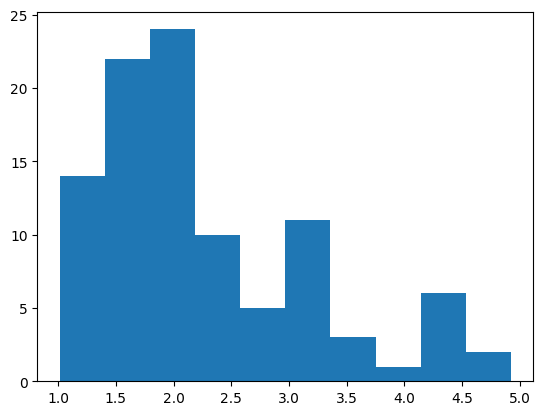

In [25]:
import matplotlib.pyplot as plt
plt.hist(unit_price_fixed)

(array([36., 34., 16.,  4.,  8.]),
 array([1.01472929, 1.79626459, 2.5777999 , 3.35933521, 4.14087051,
        4.92240582]),
 <BarContainer object of 5 artists>)

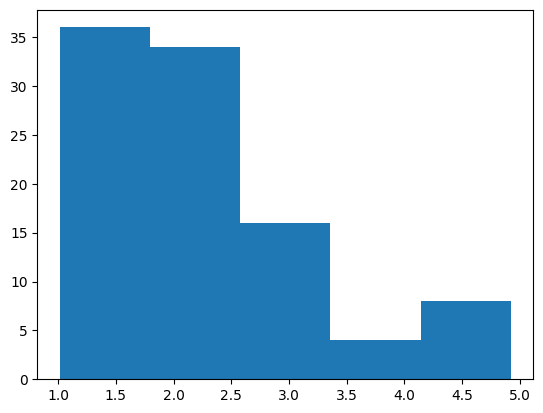

In [26]:
plt.hist(unit_price_fixed, bins = 5)

(array([12.,  2., 10., 12., 21.,  3.,  6.,  4.,  4.,  1.,  4.,  7.,  1.,
         2.,  1.,  0.,  3.,  3.,  1.,  1.]),
 array([1.01472929, 1.21011311, 1.40549694, 1.60088077, 1.79626459,
        1.99164842, 2.18703225, 2.38241607, 2.5777999 , 2.77318373,
        2.96856755, 3.16395138, 3.35933521, 3.55471903, 3.75010286,
        3.94548669, 4.14087051, 4.33625434, 4.53163817, 4.72702199,
        4.92240582]),
 <BarContainer object of 20 artists>)

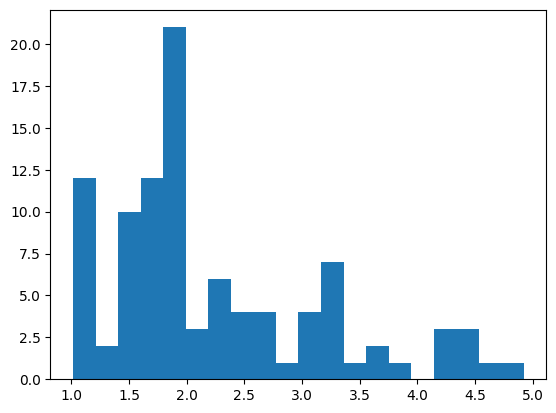

In [27]:
plt.hist(unit_price_fixed, bins = 20)

(array([0.62670991, 0.10445165, 0.52225825, 0.62670991, 1.09674234,
        0.15667748, 0.31335495, 0.2089033 , 0.2089033 , 0.05222583,
        0.2089033 , 0.36558078, 0.05222583, 0.10445165, 0.05222583,
        0.        , 0.15667748, 0.15667748, 0.05222583, 0.05222583]),
 array([1.01472929, 1.21011311, 1.40549694, 1.60088077, 1.79626459,
        1.99164842, 2.18703225, 2.38241607, 2.5777999 , 2.77318373,
        2.96856755, 3.16395138, 3.35933521, 3.55471903, 3.75010286,
        3.94548669, 4.14087051, 4.33625434, 4.53163817, 4.72702199,
        4.92240582]),
 <BarContainer object of 20 artists>)

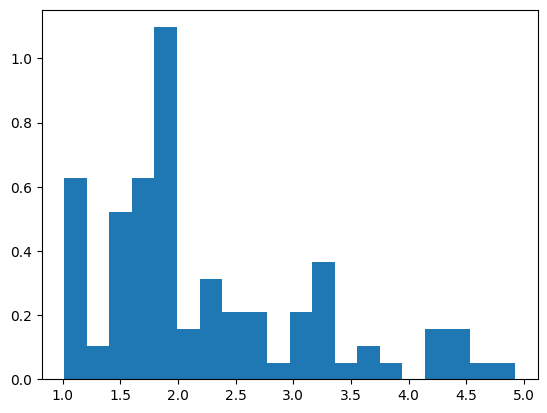

In [28]:
plt.hist(unit_price_fixed, bins = 20, density = True)

(array([0.12244898, 0.14285714, 0.24489796, 0.36734694, 0.58163265,
        0.6122449 , 0.67346939, 0.71428571, 0.75510204, 0.76530612,
        0.80612245, 0.87755102, 0.8877551 , 0.90816327, 0.91836735,
        0.91836735, 0.94897959, 0.97959184, 0.98979592, 1.        ]),
 array([1.01472929, 1.21011311, 1.40549694, 1.60088077, 1.79626459,
        1.99164842, 2.18703225, 2.38241607, 2.5777999 , 2.77318373,
        2.96856755, 3.16395138, 3.35933521, 3.55471903, 3.75010286,
        3.94548669, 4.14087051, 4.33625434, 4.53163817, 4.72702199,
        4.92240582]),
 <BarContainer object of 20 artists>)

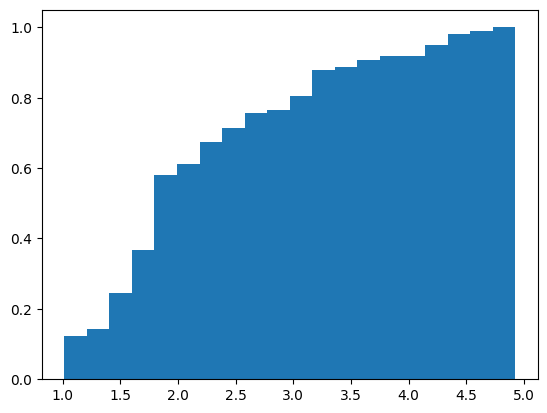

In [29]:
plt.hist(unit_price_fixed, bins = 20, density = True, cumulative = True)

In [30]:
np.sort(unit_price)[-5:]

array([4.37708001e+00, 4.52433331e+00, 4.70754876e+00, 4.92240582e+00,
       1.00000000e+06])

In [31]:
np.sort(unit_price)[np.sort(unit_price) < 5][-5:]

array([4.3475504 , 4.37708001, 4.52433331, 4.70754876, 4.92240582])

In [32]:
df_groceries.groupby("name").size()

name
apples_pound     27
bananas_pound    19
lettuce          20
milk_gallon      15
oranges_pound    18
television        1
dtype: int64

In [33]:
df_type = df_groceries.map(type)
for col in df_type.columns:
    print(col, df_type[col].unique())

name [<class 'str'>]
unit_price [<class 'float'> <class 'str'>]
quantity [<class 'int'>]
date_purchased [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
state [<class 'str'> <class 'float'>]


In [35]:
for col, row in zip(df_groceries.columns, np.vectorize(lambda x: str(type(x)))(df_groceries.values.T)):
    print(col, np.unique(row))

name ["<class 'str'>"]
unit_price ["<class 'float'>" "<class 'str'>"]
quantity ["<class 'int'>"]
date_purchased ["<class 'pandas._libs.tslibs.timestamps.Timestamp'>"]
state ["<class 'float'>" "<class 'str'>"]


In [39]:
df_groceries_fixed = df_groceries[np.vectorize(lambda x: isinstance(x, float) and x < 10)(df_groceries["unit_price"])]

In [40]:
df_groceries_fixed[["unit_price", "quantity", "date_purchased"]].mean(axis = 0)

unit_price                              2.23815
quantity                               2.734694
date_purchased    2022-04-11 19:06:07.346938880
dtype: object

In [38]:
# I want to take a dataframe column and apply the same function to teach item

# ChatGPT conversation 1

How to create a simple description of a dataframe?
ChatGPT said:
ChatGPT
To create a simple description of a DataFrame in Python, you can use a combination of df.info(), df.describe(), and df.head(). Here's how you can put them together:

python
Copy
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1], 'C': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Basic Description
print("DataFrame Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nFirst Few Rows:")
print(df.head())
This will give:

Info: Structure, data types, and null counts.
Describe: Summary statistics for numeric columns.
Head: First few rows for a quick preview.
You can combine these outputs into a simple description for your dataset.


You said:
Any other approaches?
ChatGPT said:
ChatGPT
Yes, there are other approaches to creating a simple description of a DataFrame, depending on what you're interested in. Here are a few additional ways you can describe a DataFrame:

1. Unique Value Count (for categorical columns):
If you want to understand the uniqueness of the values in each column, especially for categorical data:

python
Copy
print(df.nunique())
This will give you the count of unique values for each column.

2. Missing Data Information:
If you want to see how much missing data there is in each column:

python
Copy
print(df.isnull().sum())
This will show the count of NaN or missing values in each column.

3. Data Types (Explicit Type Overview):
You can print the data types of the columns explicitly for clarity:

python
Copy
print(df.dtypes)
This tells you whether each column is an integer, float, object (string), etc.

4. Correlation Between Numeric Columns:
If you have numeric data and want to explore correlations between columns:

python
Copy
print(df.corr())
This will give you a correlation matrix of numerical columns in the DataFrame.

5. Value Counts (for categorical columns):
If you have categorical data and want to see the frequency of each category:

python
Copy
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
This will print the count of unique values for each categorical column.

6. Shape of the DataFrame:
The .shape attribute tells you how many rows and columns are in the DataFrame:

python
Copy
print(df.shape)
7. Summary of String Columns:
If your DataFrame has textual data (strings), you can get some useful information about them using:

python
Copy
print(df.select_dtypes(include=['object']).describe())
This will show you the count, unique values, most frequent value, and the length of the longest string for each string column.

8. Custom Summary (Combining Multiple Methods):
You can combine these methods to create a more detailed description of your DataFrame:

python
Copy
print(f"Shape of DataFrame: {df.shape}")
print(f"Data Types:\n{df.dtypes}")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"Descriptive Statistics:\n{df.describe()}")
print(f"Correlation Matrix:\n{df.corr()}")
print(f"Unique Values:\n{df.nunique()}")
Example Combining Multiple Descriptions:
python
Copy
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 4, 3, 2, 1], 'C': [10, 20, None, 40, 50], 'Category': ['X', 'Y', 'X', 'Z', 'Y']}
df = pd.DataFrame(data)

# Simple description
print("Basic Info:")
print(df.info())

print("\nDescriptive Statistics (Numeric):")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Values per Column:")
print(df.nunique())

print("\nValue Counts (Category Column):")
print(df['Category'].value_counts())

print("\nCorrelation Matrix:")
print(df.corr())
This way, you can adjust the depth of the description depending on the data type and focus of your analysis.